# Evening is the Most Dangerous Period Southern Area is the Most Dangerous District During Summer in San Francisco

## Import data

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

In [2]:
crime = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', header=0)

In [5]:
crime[:10]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195


In [3]:
crime["Category"] = crime["Category"].astype('category')
crime["Descript"] = crime["Descript"].astype('string')
crime["DayOfWeek"] = crime["DayOfWeek"].astype('category')
crime["Date"] = pd.to_datetime(crime["Date"])
crime["Time"] = crime["Time"].astype('string')
crime["PdDistrict"] = crime["PdDistrict"].astype('string')

In [4]:
crime["Time"] = crime["Time"].apply(lambda r: r.split(":")[0]+":00")

## How do incidents vary by time of day?

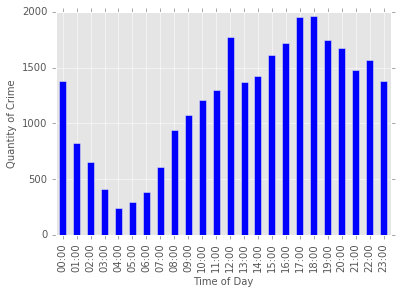

In [5]:
%matplotlib inline
plt.xlabel('Time of Day', fontsize=10)
plt.ylabel('Quantity of Crime', fontsize=10)
crime_time = crime['Time'].value_counts().sort_index()
crime_time.plot(kind='bar')

The plot shows the variation of crime by time of day. And evening is most dangerous.

## Which incidents are most common in the evening?

We define "evening" as the time interval from 17:00 to 24:00

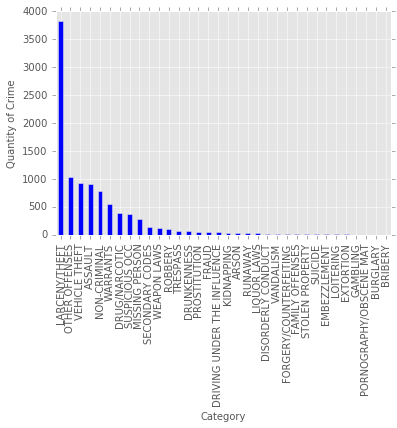

In [44]:
evening = crime[crime['Time'].apply(lambda r: r<="23:00" and r >= "18:00")]["Category"]
evening_crime = evening.value_counts()
plt.xlabel('Category', fontsize=10)
plt.ylabel('Quantity of Crime', fontsize=10)
evening_crime.plot(kind='bar')

From the plot, we can conclude "LARCENY/THEFT" are most common incident in the evening.

## During what periods of the day are robberies most common?

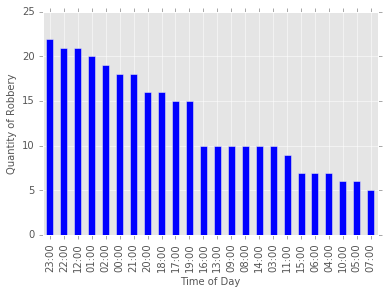

In [47]:
robbery_time = crime[crime["Category"] == "ROBBERY"]["Time"].value_counts()
plt.xlabel('Time of Day', fontsize=10)
plt.ylabel('Quantity of Robbery', fontsize=10)
robbery_time.plot(kind='bar')

From the plot, we can conclude that robberies are most common during 23:00-24:00.

## How do incidents vary by neighborhood?

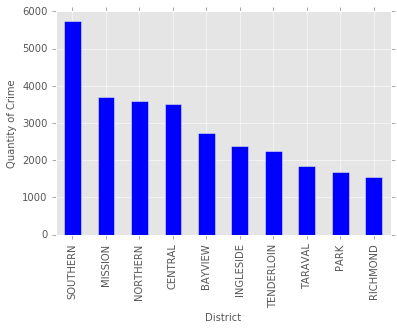

In [6]:
plt.xlabel('District', fontsize=10)
plt.ylabel('Quantity of Crime', fontsize=10)
crime_district = crime['PdDistrict'].value_counts()
crime_district.plot(kind='bar')

The plot shows the variation of crime by the district. And Southern area is most dangerous.

## Which incidents are most common in the city center?

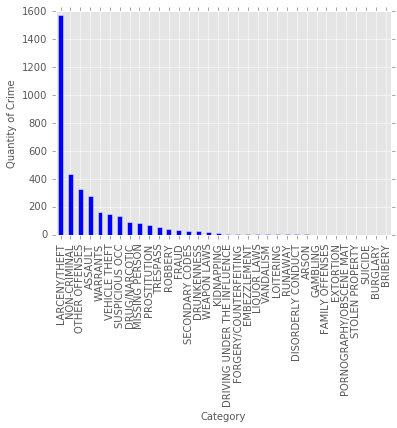

In [8]:
central = crime[crime['PdDistrict'] == "CENTRAL"]["Category"]
central_crime = central.value_counts()
plt.xlabel('Category', fontsize=10)
plt.ylabel('Quantity of Crime', fontsize=10)
central_crime.plot(kind='bar')

From the plot, we can conclude "LARCENY/THEFT" are most common incident in the central city.

## In what areas or neighborhoods are robberies or thefts most common?

### For Robberies

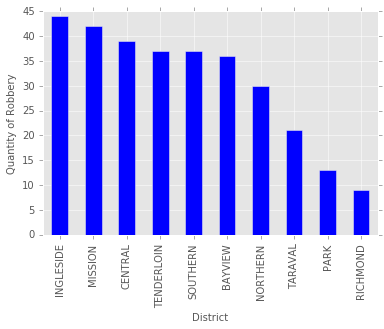

In [9]:
robbery_district = crime[crime["Category"] == "ROBBERY"]["PdDistrict"].value_counts()
plt.xlabel('District', fontsize=10)
plt.ylabel('Quantity of Robbery', fontsize=10)
robbery_district.plot(kind='bar')

From the plot, we can conclude that robberies are most common in Ingleside.

### For Thefts

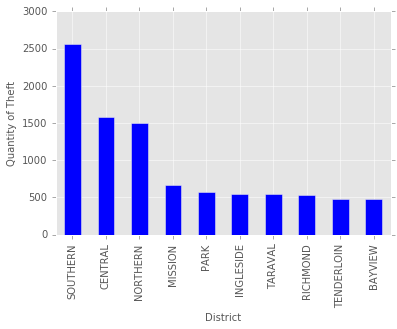

In [10]:
theft_district = crime[crime["Category"] == "LARCENY/THEFT"]["PdDistrict"].value_counts()
plt.xlabel('District', fontsize=10)
plt.ylabel('Quantity of Theft', fontsize=10)
theft_district.plot(kind='bar')

From the plot, we can conclude that thefts are most common in Southern.